Import necessary packages: Numpy, Pandas, matplotlib

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

Note that the downside of using colab is that the resources such as GPUs and CPUs are given to you only temporarily. This means something in between 30-120min. Your code will be saved but variables and computed data stored in the memory reset. If you don't have a google account you will have to upload the datasets zip.train and zip.test after the CPU was reset. This exercise does not require a GPU and will also work on your own device, if you don't want to use colab.

In [78]:
path_to_train = '/Users/maria/Desktop/machine_learning/assignment_1/zip.train'
path_to_test = '/Users/maria/Desktop/machine_learning/assignment_1/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

First of all: it's always good to analyse what you are working with. So print out some information about the dataset until you understand how it is structured:

In [79]:
print(X_train[0])
print(X_train.shape)
print(y_train.shape)
print(y_train[0])
print(X_train[0].reshape(16,16).shape)  

[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.992  0.297  1.     0.307 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.
  0.986 -0.565 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.938  0.54
  1.     0.778 -0.715 -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.257
  0.95   1.    -0.162 -1.    -1.    -1.    -0.987 -0.714 -0.832 -1.
 -1.    -1.    -1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.
 -1.    -0.55   0.485  0.996  0.867  0.092 -1.    -1.    -1.    -1.
  0.278  1.     0.877 -0.824 -1.    -0.905  0.145  0.977  1.     1.
  1.     0.99  -0.745 -1.    -1.    -0.9

The following code helps you visualizing elements of the dataset. Try to understand how this works. This will probably be handy for other exercises as well.

In [141]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]
    print(y_train[indices])

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1) 
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


[3. 0. 5. 2. 7. 0. 1. 8. 7. 1. 8. 1. 3. 8. 0. 0. 2. 6. 5. 5. 4. 2. 0. 3.
 5. 1. 6. 0. 1. 9. 3. 0. 6. 6. 3. 7. 2. 8. 8. 8. 0. 3. 0. 8. 8. 5. 3. 5.
 8. 5. 4. 6. 9. 4. 8. 7. 3. 8. 5. 7. 9. 3. 6. 1. 4. 6. 7. 1. 3. 2. 1. 2.
 2. 2. 0. 0. 0. 0. 0. 1. 5. 4. 7. 7. 0. 1. 2. 4. 0. 9.]


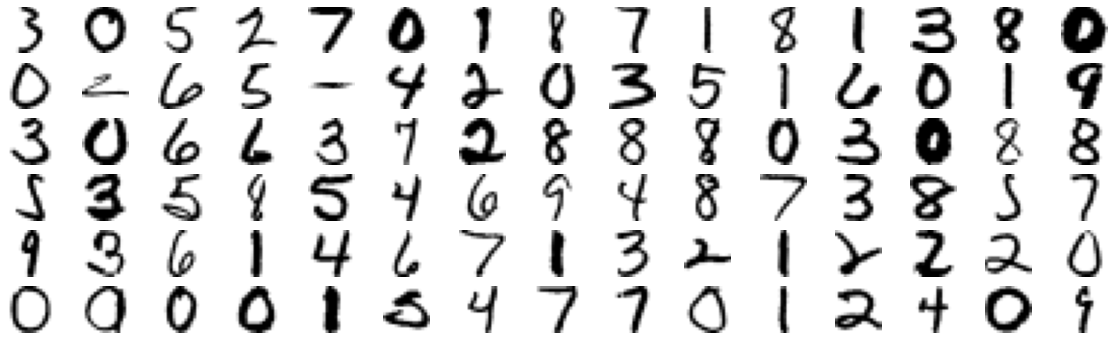

In [142]:
show_numbers(X_train)

Implement the KNearestNeighbors class.

a) Print out the accuracy.

b) Using Matplotlib, plot some of the numbers that are classified incorrectly.

c) Which k is optimal for the accuracy?

d) What are advantages and disadvantages for the k-NN-Classifier?

In [342]:
class KNearestNeighbors():
    '''
    k-nearest_neighbohrs class: input k, training set and training lables
    '''
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

        
    def predict(self, X):
        if len(X.shape) == 2:
            pass
        else:
            print("Data must be of shape (n,256) where n is the number of digits to be checked.")
            raise SystemExit('error in code want to exit')
        predicted_labels = [self._predict(x) for x in X]
        return predicted_labels
 

    def _predict(self,x):
        #compute distances
        x_1 = x
        X_2 = self.X_train
        squared_distances = self.squared_euclidean_distance(x_1, X_2)
        #find k neighbohrs
        k_NN = np.argsort(squared_distances)[:self.k]
        k_NN_labels = [self.y_train[i] for i in k_NN]        
        #find majority class
        frequencies = {}
        for item in k_NN_labels:
            frequencies[item] = frequencies.get(item, 0) + 1
        majority = max(frequencies.values())
        return list(frequencies.keys())[list(frequencies.values()).index(majority)]
    
    
    def squared_euclidean_distance(self, x_1, x_2):
        '''
        np.sum(x, axis = 1) will be summing all elements 
        over the pixel dimension (axis = 1)
        '''
        return np.sum((x_1-x_2)**2, axis = 1)

def accuracy(predicted_lables):                  
    count = 0
    indices = []
    for index, label in enumerate(y_test):
        if abs(predicted_lables[index] - y_test[index]) > 0.01:      
            count += 1
            print('y_test for ',index,'is not predicted correctly', 
                   predicted_lables[index], y_test[index])
            indices.append(index)       
    return ('The accuracy is: ', 100*(1-count/len(y_test)))                  
                  
def main():
    kNN = KNearestNeighbors(4, X_train, y_train)
    predicted_lables = kNN.predict(X_test)
    print(accuracy(predicted_lables))

main()


y_test for  17 is not predicted correctly 4.0 6.0
y_test for  27 is not predicted correctly 5.0 3.0
y_test for  53 is not predicted correctly 3.0 2.0
y_test for  92 is not predicted correctly 1.0 4.0
y_test for  122 is not predicted correctly 7.0 3.0
y_test for  131 is not predicted correctly 2.0 5.0
y_test for  134 is not predicted correctly 2.0 6.0
y_test for  145 is not predicted correctly 0.0 2.0
y_test for  160 is not predicted correctly 0.0 2.0
y_test for  164 is not predicted correctly 9.0 0.0
y_test for  198 is not predicted correctly 0.0 8.0
y_test for  217 is not predicted correctly 0.0 8.0
y_test for  233 is not predicted correctly 6.0 1.0
y_test for  253 is not predicted correctly 4.0 9.0
y_test for  265 is not predicted correctly 1.0 4.0
y_test for  279 is not predicted correctly 0.0 2.0
y_test for  300 is not predicted correctly 7.0 9.0
y_test for  301 is not predicted correctly 7.0 9.0
y_test for  339 is not predicted correctly 4.0 7.0
y_test for  349 is not predicted co

In [334]:
def show_numbers(X,indicies):
    sample_digits = X[indices]
    print(y_test[indices])
    fig = plt.figure(figsize=(20, 6))
    for i,sample in enumerate(sample_digits):
        ax = plt.subplot(8, 15, i + 1) #does not take more than 90 because 6*15=90
        img = 1-sample.reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


[6. 3. 2. 4. 3. 5. 6. 2. 2. 0. 8. 8. 1. 9. 4. 2. 9. 9. 7. 8. 1. 1. 8. 5.
 2. 9. 3. 2. 2. 2. 2. 8. 0. 2. 6. 4. 5. 2. 6. 6. 5. 7. 5. 2. 8. 4. 7. 7.
 3. 8. 2. 8. 4. 4. 5. 0. 0. 2. 6. 8. 5. 7. 3. 9. 3. 7. 8. 4. 9. 7. 4. 4.
 7. 3. 4. 4. 4. 5. 3. 3. 8. 7. 4. 9. 4. 8. 4. 3. 8. 9. 4. 4. 1. 1. 1. 9.
 4. 5. 8. 5. 5. 2. 1. 5. 4.]


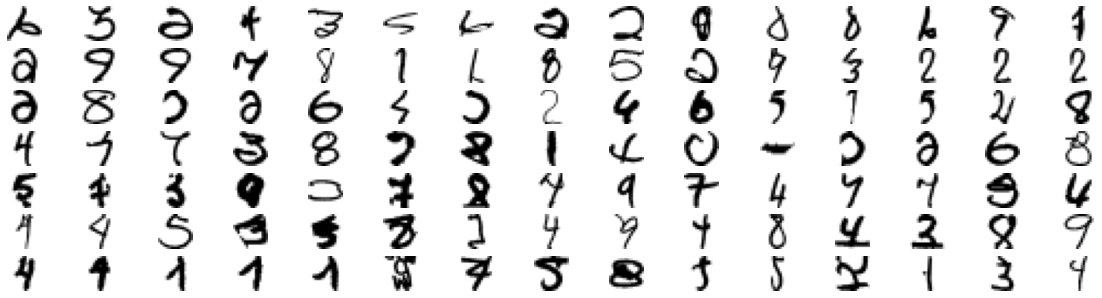

In [335]:
show_numbers(X_test,indices)